# 데이터 전처리

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UB-daram2/10days/blob/main/2-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 넘파이로 데이터 준비하기

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import numpy as np

In [4]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
fish_data = np.column_stack((fish_length, fish_weight))

In [6]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [7]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


numpy 함수 활용(column_stack, concattenate)

2개의 배열을 연결 하는 방식 제공

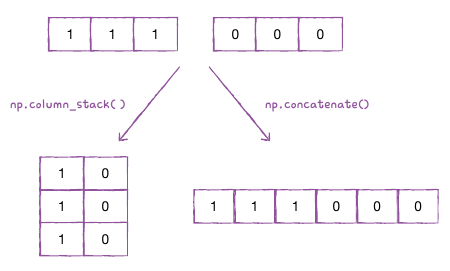

## 사이킷런으로 훈련 세트와 테스트 세트 나누기

train_test_split

훈련 세트와 테스트 세트 자동 생성 함수

이 함수는 기본적으로 25%를 테스트 세트로 생성

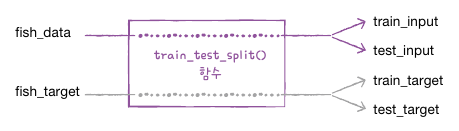

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [12]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [13]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [14]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [16]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한마리

In [17]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [18]:
print(kn.predict([[25, 150]]))

[0.]


In [19]:
import matplotlib.pyplot as plt

![image.png](
  
)

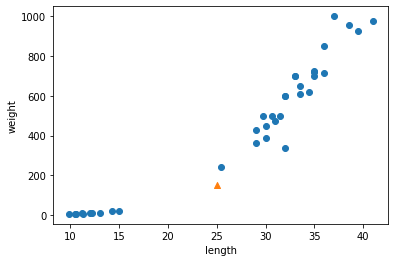

In [20]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kneighbors ()

가장 가까운 이웃을 찾아주는 메서드

In [21]:
distances, indexes = kn.kneighbors([[25, 150]])

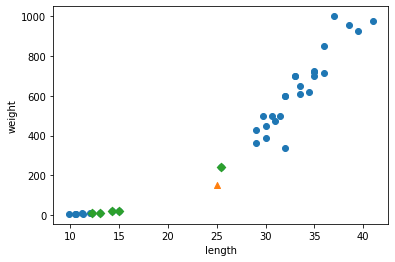

In [22]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

indexes

가까운 5개의 index 값을 반환

In [23]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [24]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


distances

가까운 5개의 거리 값 반환

In [25]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 맞춰라

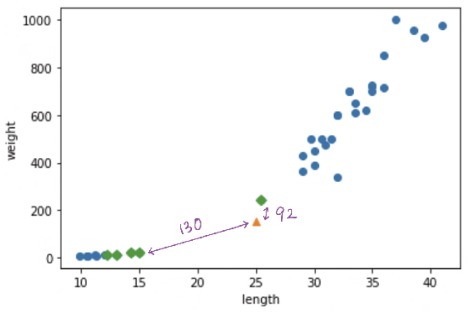

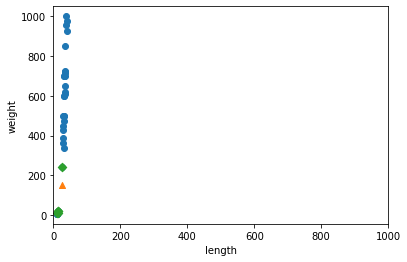

In [26]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

가로 축과 세로 축의 범위를 동일하게 두어 봤을 때, 세로 축 기준으로 이웃을 찾게 되는 현상을 찾을 수 있다.

최근접 이웃 알고리즘 단점 : 스케일이 큰 차이가 발생 되는 데이터의 정확도가 떨어진다.

모든 거리기반 알고리즘의 단점은 스케일에 따른 결과 영향을 많이 받는다.

샘플 간의 거리를 정상적으로 이용하려면 특성값을 일정한 기준으로 맞춰 주어야 한다.


표준점수 : 가장 많이 사용되는 전처리 방법

- 평균에서 표준편차의 몇 배만큼 떨어져 있는지 지표

- 실제 특성값의 크기와 상관 없이 동일한 조건으로 비교 가능하다.

분산 : 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구함

표준편차 : 분산의 제곱근으로 분산 정도 나타냄

표준점수 : 각 데이터가 원점에서 표준 편차만큼 어느 정도 떨어졌는지 나타내는 값

In [27]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

mean() : 평균 메소드

std() : 표준 편차 메소드

In [28]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


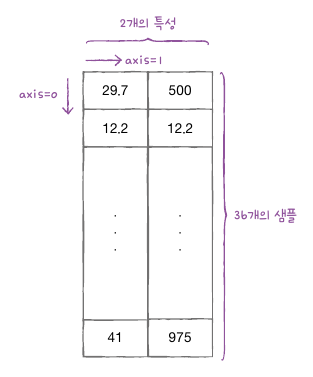

In [29]:
train_scaled = (train_input - mean) / std

넘파이 장점 : 모든 행을 mean 평균 배열 값을 자동 계산
- 해당 방식을 브로드캐스팅 (모든 배열이 넘파이로 생성 시 계산을 자동으로 처리해준다.)

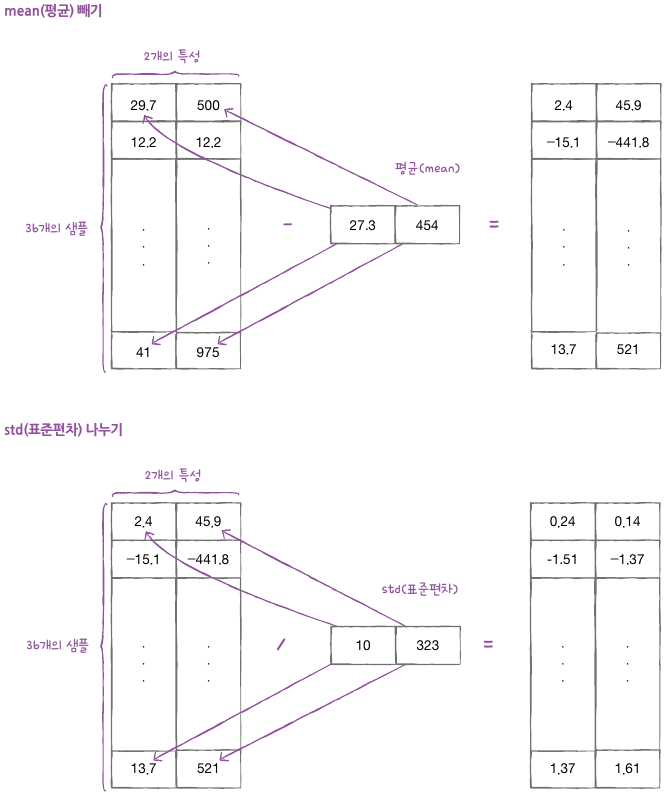

## 전처리 데이터로 모델 훈련하기

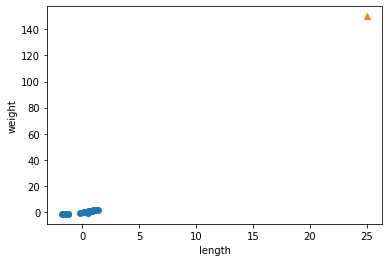

In [30]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
new = ([25, 150] - mean) / std

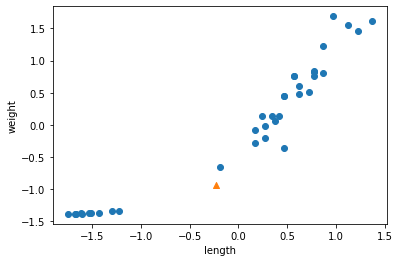

In [32]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [34]:
test_scaled = (test_input - mean) / std

In [35]:
kn.score(test_scaled, test_target)

1.0

In [36]:
print(kn.predict([new]))

[1.]


In [37]:
distances, indexes = kn.kneighbors([new])

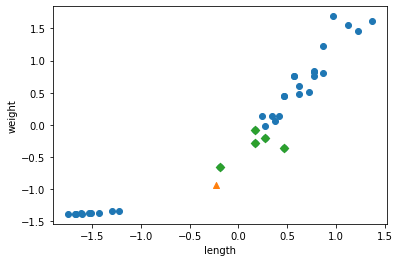

In [38]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 정리

스케일이 다른 데이터 값을 훈련하는 경우 정상적인 값 반환이 어려움

특성의 스케일을 조정하는 방법은 표준편차를 이용한 표준 점수를 내서 재 훈련


# 키워드
- 데이터 전처리 : 머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하는 단계, 상대적인 시간이 많이 소모되는 단계
- 표준점수 : 훈련세트의 스케일을 바꾸는 대표적인 방법 ((데이터 - 평균) / 표준편차)
- 브로드캐스팅 : 크기가 다른 넘파이 배열에서 행과 열 모두 자동으로 사칙 연산을 수행

# 패키지 및 함수
**scikit-learn**
- train_test_split() : 훈련 데이터를 훈련 세트와 테스트 세트로 나누는 함수, 테스트 세트 생성 비율 기본 25%
- kneighbors() : k-최근접 이웃 객체 메서드, 입력 데이터의 가까운 이웃의 거리 및 인덱스 반환